In [1]:
# SYSTEM: OCR and dependencies
!apt-get -qq update
!apt-get install -y tesseract-ocr libmagic1 poppler-utils
!apt-get install -y tesseract-ocr-eng tesseract-ocr-hin

# PYTHON: All libraries
!pip install -q pytesseract pdf2image python-magic
!pip install -q opencv-python-headless networkx
!pip install -q sentence-transformers scikit-learn
!pip install -q rank-bm25 nltk

import nltk
nltk.download('punkt')


W: Skipping acquire of configured file 'main/source/Sources' as repository 'https://r2u.stat.illinois.edu/ubuntu jammy InRelease' does not seem to provide it (sources.list entry misspelt?)
Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
tesseract-ocr is already the newest version (4.1.1-2.1build1).
libmagic1 is already the newest version (1:5.41-3ubuntu0.1).
libmagic1 set to manually installed.
The following additional packages will be installed:
  libpoppler-dev libpoppler-private-dev libpoppler118
Recommended packages:
  poppler-data
The following NEW packages will be installed:
  poppler-utils
The following packages will be upgraded:
  libpoppler-dev libpoppler-private-dev libpoppler118
3 upgraded, 1 newly installed, 0 to remove and 71 not upgraded.
Need to get 1,471 kB of archives.
After this operation, 697 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu jammy-updates/main amd64 libpoppler-private-dev

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [2]:
!pip install --upgrade --force-reinstall nltk
import nltk
nltk.download('punkt')


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.5/40.5 kB 1.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.7/57.7 kB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 22.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 801.9/801.9 kB 32.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 102.2/102.2 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 307.7/307.7 kB 18.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 78.5/78.5 kB 4.2 MB/s eta 0:00:00
  Attempting uninstall: tqdm
    Found existing installation: tqdm 4.67.1
    Uninstalling tqdm-4.67.1:
      Successfully uninstalled tqdm-4.67.1
  Attempting uninstall: regex
    Found existing installation: regex 2024.11.6
    Uninstalling regex-2024.11.6:
      Successfully uninstalled regex-2024.11.6
  Attempting uninstall: joblib
    Found existing installation: joblib 1.5.1
    Uninstalling joblib-1.5.1:
      Successfully uninstall

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [1]:
#STEP 1

import os

DATA_DIR = "/content/data"
RAW_DIR = os.path.join(DATA_DIR, "raw")
OCR_DIR = os.path.join(DATA_DIR, "ocr_text")

for d in [DATA_DIR, RAW_DIR, OCR_DIR]:
    os.makedirs(d, exist_ok=True)

print("Raw folder:", RAW_DIR)
print("OCR output folder:", OCR_DIR)


Raw folder: /content/data/raw
OCR output folder: /content/data/ocr_text


In [2]:
#STEP 2 (for ocr)

import cv2
import pytesseract
from pdf2image import convert_from_path

def _preprocess_image(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    blur = cv2.medianBlur(gray, 3)
    th = cv2.adaptiveThreshold(
        blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C,
        cv2.THRESH_BINARY, 45, 11
    )
    return th

def ocr_to_txts(path, out_dir=OCR_DIR, langs="eng"):
    txt_paths = []
    base = os.path.splitext(os.path.basename(path))[0]
    if path.lower().endswith(".pdf"):
        pages = convert_from_path(path, dpi=300)
        for i, p in enumerate(pages, start=1):
            png_path = os.path.join(out_dir, f"{base}_page{i:04d}.png")
            p.save(png_path, "PNG")
            img = cv2.imread(png_path)
            proc = _preprocess_image(img)
            text = pytesseract.image_to_string(proc, lang=langs)
            txt_path = f"{png_path}.txt"
            with open(txt_path, "w", encoding="utf-8") as f:
                f.write(text)
            txt_paths.append(txt_path)
    else:
        img = cv2.imread(path)
        proc = _preprocess_image(img)
        text = pytesseract.image_to_string(proc, lang=langs)
        txt_path = os.path.join(out_dir, f"{base}_page0001.png.txt")
        with open(txt_path, "w", encoding="utf-8") as f:
            f.write(text)
        txt_paths.append(txt_path)
    return txt_paths

# Run OCR for all files in RAW_DIR
for fname in os.listdir(RAW_DIR):
    fpath = os.path.join(RAW_DIR, fname)
    ocr_to_txts(fpath, out_dir=OCR_DIR, langs="eng+hin")

print("Done OCR. Example text files:", os.listdir(OCR_DIR))


Done OCR. Example text files: ['BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0004.png', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0005.png', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0001.png.txt', 'FM6R4D8778085BCA47BC959C2D16CC2479B8_page0004.png.txt', 'FNT14RBBC96EA1D8574325AF4314261DE5133A_page0001.png.txt', 'FNT14RBBC96EA1D8574325AF4314261DE5133A_page0001.png', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0003.png', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0001.png', 'FM6R4D8778085BCA47BC959C2D16CC2479B8_page0003.png.txt', 'FNT14RBBC96EA1D8574325AF4314261DE5133A_page0003.png.txt', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0007.png.txt', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0002.png.txt', 'CIC_Amendment_Regulations_2021_21032024_page0001.png.txt', 'FNT14RBBC96EA1D8574325AF4314261DE5133A_page0004.png', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0005.png.txt', 'BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_page0007.png', 'B

In [2]:
#STEP 2 (for txt files)

import os
import shutil

# If your RAW_DIR has txt files that are already OCRed or ready text, just copy/move them to OCR_DIR
for fname in os.listdir(RAW_DIR):
    if fname.lower().endswith(".txt"):
        src = os.path.join(RAW_DIR, fname)
        dst = os.path.join(OCR_DIR, fname)
        # Copy txt file to OCR_DIR if not already there
        if not os.path.exists(dst):
            shutil.copy(src, dst)
        print(f"Copied: {fname} to OCR folder")
    else:
        print(f"Skipping non-txt file: {fname}")

print("All txt files ready for further processing.")


Copied: fin1.txt to OCR folder
Copied: fin4.txt to OCR folder
Copied: fin2.txt to OCR folder
Copied: fin3.txt to OCR folder
All txt files ready for further processing.


In [3]:
#STEP 3

import re
import pandas as pd

def chunk_paragraphs(ocr_dir=OCR_DIR, out_csv=os.path.join(DATA_DIR, "chunks.csv")):
    rows = []
    for name in sorted(os.listdir(ocr_dir)):
        if not name.endswith(".txt"): continue
        path = os.path.join(ocr_dir, name)
        if os.path.getsize(path) == 0: continue  # skip empty
        base = name.split("_page")[0]
        m = re.search(r"_page(\d+)", name)
        page = int(m.group(1)) if m else 1
        with open(path, encoding="utf-8") as f:
            raw = f.read()
        paras = [p.strip() for p in re.split(r"\n{2,}", raw) if p.strip()]
        for i, para in enumerate(paras, start=1):
            chunk_id = f"{base}_p{page:04d}_para{i:03d}"
            rows.append({
                "chunk_id": chunk_id,
                "doc_base": base,
                "page_num": page,
                "para_idx": i,
                "text": para
            })
    if not rows:
        raise ValueError("No valid chunks created — check OCR output in OCR_DIR")
    df = pd.DataFrame(rows)
    df.to_csv(out_csv, index=False)
    return df

df_chunks = chunk_paragraphs(OCR_DIR, out_csv=os.path.join(DATA_DIR, "chunks.csv"))
df_chunks.head()


,chunk_id,doc_base,page_num,para_idx,text
0,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,1,1,RESERVE BANK OF INDIA\nFOREIGN EXCHANGE DEPART...
1,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,1,2,Notification No. FEMA.3(R)/2018-RB December 17...
2,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,1,3,"(Amended up to May 28, 2021)"
3,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,1,4,"(Amended up to February 27, 2019)"
4,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,1,5,Foreign Exchange Management (Borrowing and Len...


In [4]:
#STEP 3 (token wise chunking)

import os
import re
import pandas as pd

def chunk_by_token_limit(ocr_dir=OCR_DIR, out_csv=os.path.join(DATA_DIR, "chunks_50tokens.csv"), tokens_per_chunk=50):
    rows = []
    for name in sorted(os.listdir(ocr_dir)):
        if not name.endswith(".txt"):
            continue
        path = os.path.join(ocr_dir, name)
        if os.path.getsize(path) == 0:
            continue  # skip empty
        base = os.path.splitext(name)  # <--- fixed base extraction
        m = re.search(r"_page(\d+)", name)
        page = int(m.group(1)) if m else 1
        with open(path, encoding="utf-8") as f:
            raw = f.read().strip()

        tokens = raw.split()
        num_chunks = (len(tokens) + tokens_per_chunk - 1) // tokens_per_chunk

        for i in range(num_chunks):
            chunk_tokens = tokens[i*tokens_per_chunk:(i+1)*tokens_per_chunk]
            chunk_text = " ".join(chunk_tokens)
            chunk_id = f"{base}_p{page:04d}_chunk{i+1:03d}"
            rows.append({
                "chunk_id": chunk_id,
                "doc_base": base,
                "page_num": page,
                "chunk_idx": i+1,
                "text": chunk_text
            })

    if not rows:
        raise ValueError("No valid chunks created — check OCR output in OCR_DIR")
    df = pd.DataFrame(rows)
    df.to_csv(out_csv, index=False)
    return df


df_chunks_50 = chunk_by_token_limit()
print(df_chunks_50["doc_base"].value_counts())
print(df_chunks_50.head(20))



doc_base
(fin1, .txt)    10
(fin2, .txt)     9
(fin3, .txt)     9
(fin4, .txt)     8
Name: count, dtype: int64
                           chunk_id      doc_base  page_num  chunk_idx  \
0   ('fin1', '.txt')_p0001_chunk001  (fin1, .txt)         1          1   
1   ('fin1', '.txt')_p0001_chunk002  (fin1, .txt)         1          2   
2   ('fin1', '.txt')_p0001_chunk003  (fin1, .txt)         1          3   
3   ('fin1', '.txt')_p0001_chunk004  (fin1, .txt)         1          4   
4   ('fin1', '.txt')_p0001_chunk005  (fin1, .txt)         1          5   
5   ('fin1', '.txt')_p0001_chunk006  (fin1, .txt)         1          6   
6   ('fin1', '.txt')_p0001_chunk007  (fin1, .txt)         1          7   
7   ('fin1', '.txt')_p0001_chunk008  (fin1, .txt)         1          8   
8   ('fin1', '.txt')_p0001_chunk009  (fin1, .txt)         1          9   
9   ('fin1', '.txt')_p0001_chunk010  (fin1, .txt)         1         10   
10  ('fin2', '.txt')_p0001_chunk001  (fin2, .txt)         1          1   
1

In [4]:
print(df_chunks.shape)               # (number_of_rows, number_of_columns)
print(df_chunks['text'].head())      # Shows the first 5 text chunks


(387, 5)
0    RESERVE BANK OF INDIA\nFOREIGN EXCHANGE DEPART...
1    Notification No. FEMA.3(R)/2018-RB December 17...
2                         (Amended up to May 28, 2021)
3                    (Amended up to February 27, 2019)
4    Foreign Exchange Management (Borrowing and Len...
Name: text, dtype: object


In [6]:
#STEP 3.5



In [5]:
#STEP 4

from sklearn.feature_extraction.text import TfidfVectorizer
import numpy as np

def compute_keywords_per_text(texts, topk=8, ngram_range=(1,2), min_df=1):
    vect = TfidfVectorizer(ngram_range=ngram_range, min_df=min_df, stop_words="english")
    X = vect.fit_transform(texts)
    vocab = np.array(vect.get_feature_names_out())
    keywords = []
    for i in range(X.shape[0]):
        row = X[i].toarray().ravel()
        idx = np.argsort(row)[::-1][:topk]
        kw = [vocab[j] for j in idx if row[j] > 0]
        keywords.append(kw)
    return keywords

df_chunks["keywords"] = compute_keywords_per_text(
    df_chunks["text"].astype(str).tolist(), topk=8, ngram_range=(1,2)
)
df_chunks.to_csv(os.path.join(DATA_DIR, "chunks_kw.csv"), index=False)
df_chunks[["chunk_id", "keywords"]].head()


,chunk_id,keywords
0,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,"[001, 400, 400 001, mumbai 400, central office..."
1,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,"[2018, 2018 amended, amended july, 2018 rb, rb..."
2,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,"[amended 28, 28 2021, 28, 2021, amended]"
3,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,"[amended february, 27 2019, 27, february 27, f..."
4,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,"[lending regulations, regulations 2018, manage..."


In [6]:
import nltk
nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.


True

In [7]:
#STEP 5

import os

from nltk.tokenize import sent_tokenize

DATA_DIR = "/content/data"  # or your desired local folder path

def pack_sections(df_chunks, max_tokens=2000):
    sections, buf, cur_doc, sec_idx, tok_count = [], [], None, 1, 0
    for _, r in df_chunks.iterrows():
        if cur_doc != r["doc_base"]:
            if buf:
                sections.append({"section_id": f"{cur_doc}_S{sec_idx:02d}", "doc_base": cur_doc, "text": " ".join(buf)})
                buf, tok_count = [], 0
            cur_doc, sec_idx = r["doc_base"], 1
        t = r["text"]
        buf.append(t)
        tok_count += len(t.split())
        if tok_count >= max_tokens:
            sections.append({"section_id": f"{cur_doc}_S{sec_idx:02d}", "doc_base": cur_doc, "text": " ".join(buf)})
            buf, tok_count, sec_idx = [], 0, sec_idx+1
    if buf:
        sections.append({"section_id": f"{cur_doc}_S{sec_idx:02d}", "doc_base": cur_doc, "text": " ".join(buf)})
    return pd.DataFrame(sections)

def summarize_extractive(text, target_words=240):
    sents = sent_tokenize(text)
    if len(sents) <= 3:
        return " ".join(sents)
    from sklearn.feature_extraction.text import TfidfVectorizer
    vect = TfidfVectorizer(stop_words="english")
    X = vect.fit_transform(sents)
    scores = X.sum(axis=1).A.ravel()
    order = np.argsort(scores)[::-1]
    out, w = [], 0
    for i in order:
        sent = sents[i]
        out.append(sent)
        w += len(sent.split())
        if w >= target_words:
            break
    return " ".join(out)

def build_section_table(df_chunks, out_csv=os.path.join(DATA_DIR, "sections.csv")):
    df_sec = pack_sections(df_chunks, max_tokens=2000)
    df_sec["summary"] = df_sec["text"].apply(lambda t: summarize_extractive(t, target_words=240))
    df_sec.to_csv(out_csv, index=False)
    return df_sec

df_sections = build_section_table(df_chunks, out_csv=os.path.join(DATA_DIR, "sections.csv"))
df_sections.head()


,section_id,doc_base,text,summary
0,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S01,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,RESERVE BANK OF INDIA\nFOREIGN EXCHANGE DEPART...,"Definitions: - In these regulations, unless th..."
1,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S02,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,"India) Regulations, 2017, notified vide Notifi...",Lending by an Authorised Dealer i) i) ii) An A...
2,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S03,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,Provided that non-payment of penalty as above ...,Indian companies may grant loans in foreign ex...
3,CIC_Amendment_Regulations_2021_21032024_S01,CIC_Amendment_Regulations_2021_21032024,रजिस्ट्री सं. डी.एल.- 33004/99 REGD. No. D. L....,विनियम 3 का संशोधन प्रत्यय विषयक जानकारी कंपनी...
4,FM6R4D8778085BCA47BC959C2D16CC2479B8_S01,FM6R4D8778085BCA47BC959C2D16CC2479B8,RESERVE BANK OF INDIA\n(Foreign Exchange Depar...,Export of foreign exchange and currency notes:...


In [8]:
#STEP 6

from sentence_transformers import SentenceTransformer

model = SentenceTransformer("BAAI/bge-large-en-v1.5")
section_emb = model.encode(df_sections["summary"].tolist(), normalize_embeddings=True, show_progress_bar=True, batch_size=32)
chunk_emb = model.encode(df_chunks["text"].tolist(), normalize_embeddings=True, show_progress_bar=True, batch_size=32)

import numpy as np
np.save(os.path.join(DATA_DIR, "section_emb.npy"), section_emb)
np.save(os.path.join(DATA_DIR, "chunk_emb.npy"), chunk_emb)


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/52.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/779 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.34G [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/366 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/125 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/191 [00:00<?, ?B/s]

Batches:   0%|          | 0/1 [00:00<?, ?it/s]

Batches:   0%|          | 0/13 [00:00<?, ?it/s]

In [9]:
# STEP 7: Global Candidate Retrieval by Section Embeddings with cosine similarity

import os
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
import numpy as np

# Make sure DATA_DIR is defined (adjust path as per your environment)
DATA_DIR = "/content/data"

def get_global_candidates(df_sections, sec_emb, threshold=0.1, top_k=20):
    pairs = []
    n = len(df_sections)
    for i in range(n):
        sims = cosine_similarity([sec_emb[i]], sec_emb)[0]
        rank = np.argsort(sims)[::-1]
        for j in rank[1: top_k+1]:
            # Skip same document sections
            if df_sections.iloc[i]["doc_base"] == df_sections.iloc[j]["doc_base"]:
                continue
            if sims[j] >= threshold:
                pairs.append({
                    "sec_a": df_sections.iloc[i]["section_id"],
                    "sec_b": df_sections.iloc[j]["section_id"],
                    "doc_a": df_sections.iloc[i]["doc_base"],
                    "doc_b": df_sections.iloc[j]["doc_base"],
                    "global_sim": float(sims[j])
                })
    df = pd.DataFrame(pairs).drop_duplicates(subset=["sec_a","sec_b"])
    df.to_csv(os.path.join(DATA_DIR, "global_section_candidates.csv"), index=False)
    return df

# Assuming df_sections and section_emb are already computed from previous steps

# Run global candidate retrieval with a low threshold (e.g., 0.1) to get candidates
df_global = get_global_candidates(df_sections, section_emb, threshold=0.1, top_k=20)

print(f"Number of global candidate pairs: {len(df_global)}")
print(df_global.head())


Number of global candidate pairs: 34
                                              sec_a  \
0  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S01   
1  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S01   
2  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S01   
3  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S01   
4  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S02   

                                         sec_b  \
0   FNT14RBBC96EA1D8574325AF4314261DE5133A_S02   
1     FM6R4D8778085BCA47BC959C2D16CC2479B8_S01   
2   FNT14RBBC96EA1D8574325AF4314261DE5133A_S01   
3  CIC_Amendment_Regulations_2021_21032024_S01   
4   FNT14RBBC96EA1D8574325AF4314261DE5133A_S02   

                                          doc_a  \
0  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945   
1  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945   
2  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945   
3  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945   
4  BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945   

                        

In [10]:
import numpy as np

for i in range(len(df_sections)):
    sims = cosine_similarity([section_emb[i]], section_emb)[0]
    # Ignore same doc sections
    sims_other_docs = [sims[j] for j in range(len(sims))
                       if df_sections.iloc[i]["doc_base"] != df_sections.iloc[j]["doc_base"]]
    if sims_other_docs:
        print(f"Max similarity for section {df_sections.iloc[i]['section_id']} to other docs: {np.max(sims_other_docs)}")


Max similarity for section BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S01 to other docs: 0.7404924631118774
Max similarity for section BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S02 to other docs: 0.6867222189903259
Max similarity for section BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S03 to other docs: 0.7786885499954224
Max similarity for section CIC_Amendment_Regulations_2021_21032024_S01 to other docs: 0.6839148998260498
Max similarity for section FM6R4D8778085BCA47BC959C2D16CC2479B8_S01 to other docs: 0.7988780736923218
Max similarity for section FNT14RBBC96EA1D8574325AF4314261DE5133A_S01 to other docs: 0.7988780736923218
Max similarity for section FNT14RBBC96EA1D8574325AF4314261DE5133A_S02 to other docs: 0.7710636258125305


In [11]:
#STEP 8

from rank_bm25 import BM25Okapi

def build_indices_for_chunks(df_chunks):
    doc_groups = df_chunks.groupby("doc_base")
    info = {}
    for doc, grp in doc_groups:
        chunk_ids = grp["chunk_id"].tolist()
        texts     = grp["text"].tolist()
        keywords  = compute_keywords_per_text(texts, topk=8, ngram_range=(1,2))
        info[doc] = {
            "chunk_ids": chunk_ids,
            "texts": texts,
            "keywords": keywords
        }
    return info

def keyword_overlap(kws_a, kws_b):
    s1, s2 = set(kws_a), set(kws_b)
    inter = list(s1 & s2)
    return inter, (len(inter) / (1 + min(len(s1), len(s2))))

def local_links_for_section_pair(docA, docB, info, chunk_emb_df, chunk_emb, dense_threshold=0.3, top_k_bm25=10):
    ids_a   = info[docA]["chunk_ids"]; texts_a = info[docA]["texts"]; kws_a = info[docA]["keywords"]
    ids_b   = info[docB]["chunk_ids"]; texts_b = info[docB]["texts"]; kws_b = info[docB]["keywords"]

    tokenized_b = [t.lower().split() for t in texts_b]
    bm25_b = BM25Okapi(tokenized_b)
    id_to_row = {cid: i for i, cid in enumerate(chunk_emb_df["chunk_id"].tolist())}

    edges = []
    for ia, ca in enumerate(ids_a):
        query_tokens = texts_a[ia].lower().split()
        scores = bm25_b.get_scores(query_tokens)
        idx_sorted = np.argsort(scores)[::-1][:max(top_k_bm25, 1)]
        cand_b = [(ids_b[j], float(scores[j])) for j in idx_sorted]

        for cb, bm25_score in cand_b:
            ra, rb = id_to_row[ca], id_to_row[cb]
            # FIXED: Extract scalar similarity by indexing [0]
            cos = float(cosine_similarity([chunk_emb[ra]], [chunk_emb[rb]]).item())

            if cos >= dense_threshold:
                inter, overlap_ratio = keyword_overlap(kws_a[ia], kws_b[ids_b.index(cb)])
                edges.append({
                    "chunk_a": ca,
                    "chunk_b": cb,
                    "doc_a": docA,
                    "doc_b": docB,
                    "cosine": cos,
                    "bm25": bm25_score,
                    "shared_keywords": "|".join(inter[:12]),
                    "kw_overlap_ratio": overlap_ratio
                })
    return edges


def run_local_stage(df_sections_pairs, df_chunks, chunk_embeddings, dense_threshold=0.3, top_k_bm25=10):
    info = build_indices_for_chunks(df_chunks)
    edges_all = []
    chunk_emb_df = df_chunks[["chunk_id"]].reset_index(drop=True)
    for _, r in df_sections_pairs.iterrows():
        docA, docB = r["doc_a"], r["doc_b"]
        edges = local_links_for_section_pair(
            docA, docB, info, chunk_emb_df, chunk_embeddings,
            dense_threshold=dense_threshold, top_k_bm25=top_k_bm25
        )
        for e in edges:
            e["global_sim"] = r["global_sim"]
            e["sec_pair"]   = f"{r['sec_a']}__{r['sec_b']}"
        edges_all.extend(edges)

    df_edges = pd.DataFrame(edges_all).drop_duplicates(subset=["chunk_a","chunk_b"])
    df_edges.to_csv(os.path.join(DATA_DIR, "local_chunk_edges.csv"), index=False)
    return df_edges

df_edges  = run_local_stage(df_global, df_chunks, chunk_emb, dense_threshold=0.3, top_k_bm25=10)
df_edges.head()


,chunk_a,chunk_b,doc_a,doc_b,cosine,bm25,shared_keywords,kw_overlap_ratio,global_sim,sec_pair
0,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,FNT14RBBC96EA1D8574325AF4314261DE5133A_p0001_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,FNT14RBBC96EA1D8574325AF4314261DE5133A,1.000000,39.359077,001|mumbai 400|central office|400|department c...,0.555556,0.740492,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S...
1,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,FNT14RBBC96EA1D8574325AF4314261DE5133A_p0003_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,FNT14RBBC96EA1D8574325AF4314261DE5133A,0.514218,5.931690,,0.000000,0.740492,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S...
2,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,FNT14RBBC96EA1D8574325AF4314261DE5133A_p0004_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,FNT14RBBC96EA1D8574325AF4314261DE5133A,0.587098,4.974609,,0.000000,0.740492,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S...
3,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,FNT14RBBC96EA1D8574325AF4314261DE5133A_p0005_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,FNT14RBBC96EA1D8574325AF4314261DE5133A,0.590591,4.725239,,0.000000,0.740492,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S...
4,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_p...,FNT14RBBC96EA1D8574325AF4314261DE5133A_p0003_p...,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945,FNT14RBBC96EA1D8574325AF4314261DE5133A,0.619909,4.408143,,0.000000,0.740492,BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945_S...


In [12]:
#STEP 9

import networkx as nx

def build_graph(df_edges):
    G = nx.Graph()
    for _, r in df_edges.iterrows():
        u, v = r["chunk_a"], r["chunk_b"]
        G.add_edge(u, v, weight=float(r["cosine"]), bm25=float(r["bm25"]), kw_overlap=float(r["kw_overlap_ratio"]), shared_keywords=r["shared_keywords"])
    return G

G = build_graph(df_edges)
print(f"Graph: {len(G.nodes)} nodes, {len(G.edges)} edges")


Graph: 387 nodes, 10008 edges


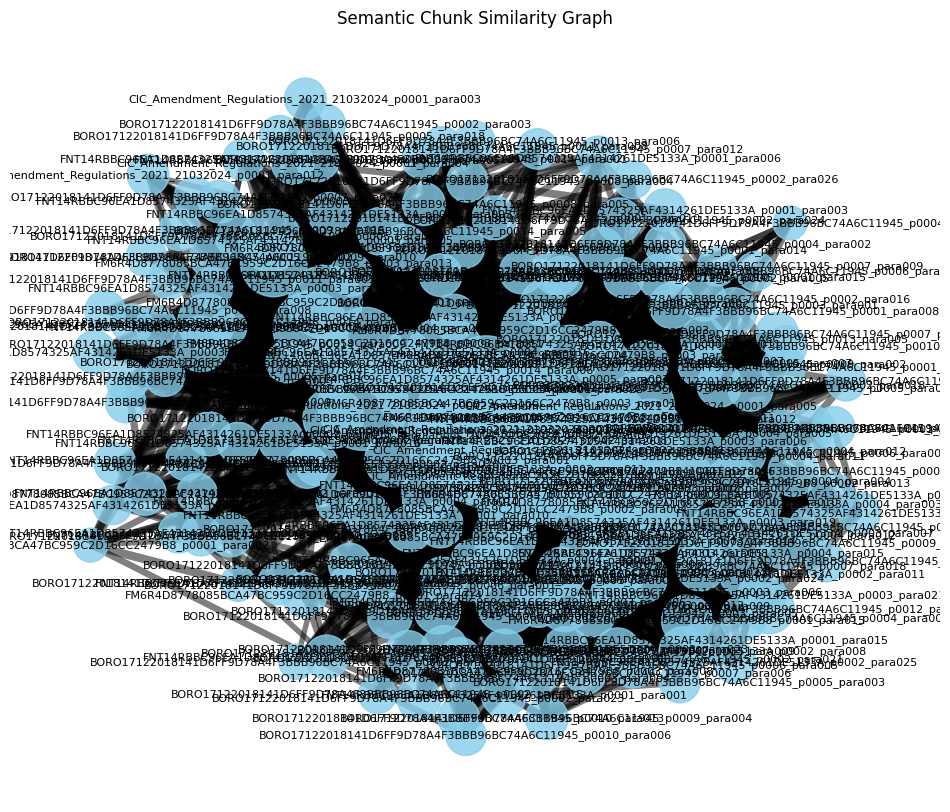

In [13]:
#STEP 10

import matplotlib.pyplot as plt

# STEP 10: Visualize the semantic graph
def visualize_graph(G, max_nodes=200):
    plt.figure(figsize=(12, 10))
    # Limit graph to smaller subgraph if too large
    if len(G.nodes) > max_nodes:
        # Take largest connected component or a subgraph of top nodes by degree
        largest_cc = max(nx.connected_components(G), key=len)
        sub_nodes = list(largest_cc)[:max_nodes]
        H = G.subgraph(sub_nodes)
    else:
        H = G

    pos = nx.spring_layout(H, k=0.15, iterations=20)

    # Node sizes proportional to degree
    node_sizes = [100 + 50 * H.degree(n) for n in H.nodes]

    # Edge widths proportional to cosine similarity weight
    edges = H.edges(data=True)
    edge_widths = [2 + 5 * d.get('weight', 0.1) for _, _, d in edges]

    nx.draw_networkx_nodes(H, pos, node_size=node_sizes, node_color='skyblue', alpha=0.8)
    nx.draw_networkx_edges(H, pos, width=edge_widths, alpha=0.5)
    nx.draw_networkx_labels(H, pos, font_size=8)

    plt.title("Semantic Chunk Similarity Graph")
    plt.axis('off')
    plt.show()

# Call visualization on your graph G
visualize_graph(G)


In [15]:
import networkx as nx
import matplotlib.pyplot as plt
from collections import defaultdict

# Aggregate edges by document pairs with average similarity and shared keywords
def build_doc_level_graph(df_edges):
    G = nx.Graph()
    doc_edge_data = defaultdict(lambda: {'weights': [], 'kw_sets': []})

    for _, row in df_edges.iterrows():
        doc_a, doc_b = row['doc_a'], row['doc_b']
        if doc_a == doc_b:
            continue  # Skip self-loops

        key = tuple(sorted([doc_a, doc_b]))
        doc_edge_data[key]['weights'].append(row['cosine'])
        kws = set(row['shared_keywords'].split('|')) if row['shared_keywords'] else set()
        doc_edge_data[key]['kw_sets'].append(kws)

    for (doc_a, doc_b), data in doc_edge_data.items():
        avg_weight = sum(data['weights']) / len(data['weights'])
        # Combine shared keywords from all edges, pick most common keywords
        combined_kws = set()
        for kwset in data['kw_sets']:
            combined_kws.update(kwset)
        kw_label = ", ".join(sorted(list(combined_kws))[:10])  # Limit label length
        G.add_edge(doc_a, doc_b, weight=avg_weight, shared_keywords=kw_label)

    # Add nodes (documents)
    docs = set()
    for _, row in df_edges.iterrows():
        docs.add(row['doc_a'])
        docs.add(row['doc_b'])
    for doc in docs:
        G.add_node(doc)

    return G

G_doc = build_doc_level_graph(df_edges)


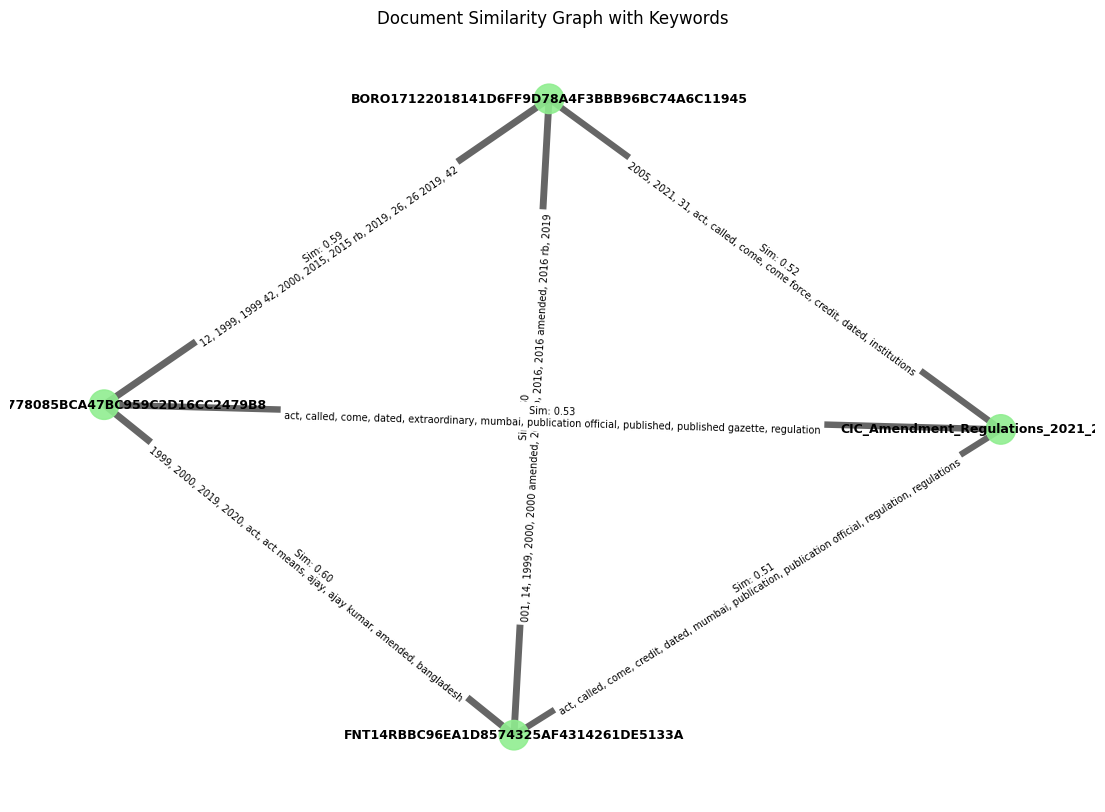

In [16]:
def visualize_doc_graph(G):
    plt.figure(figsize=(14, 10))
    pos = nx.spring_layout(G, k=0.6, iterations=50)

    node_sizes = [300 + 50 * G.degree(n) for n in G.nodes]
    edge_widths = [2 + 5 * G[u][v]['weight'] for u, v in G.edges]

    nx.draw_networkx_nodes(G, pos, node_size=node_sizes, node_color='lightgreen', alpha=0.9)
    nx.draw_networkx_edges(G, pos, width=edge_widths, alpha=0.6)

    # Draw node labels (document IDs)
    nx.draw_networkx_labels(G, pos, font_size=9, font_weight='bold')

    # Draw edge labels (similarity and keywords)
    edge_labels = {}
    for u, v, d in G.edges(data=True):
        label = f"Sim: {d['weight']:.2f}"
        if d.get('shared_keywords'):
            label += f"\n{d['shared_keywords']}"
        edge_labels[(u, v)] = label

    nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, font_size=7, label_pos=0.5)

    plt.title("Document Similarity Graph with Keywords")
    plt.axis('off')
    plt.show()

visualize_doc_graph(G_doc)


In [17]:
print("Document-Level Similarity Between Documents:\n")

for u, v, d in G_doc.edges(data=True):
    print(f"Documents: {u} <--> {v}")
    print(f"Similarity Score: {d['weight']:.4f}")
    print(f"Shared Keywords: {d['shared_keywords']}\n")


Document-Level Similarity Between Documents:

Documents: BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945 <--> FNT14RBBC96EA1D8574325AF4314261DE5133A
Similarity Score: 0.5952
Shared Keywords: 001, 14, 1999, 2000, 2000 amended, 2000 rb, 2016, 2016 amended, 2016 rb, 2019

Documents: BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945 <--> FM6R4D8778085BCA47BC959C2D16CC2479B8
Similarity Score: 0.5917
Shared Keywords: 12, 1999, 1999 42, 2000, 2015, 2015 rb, 2019, 26, 26 2019, 42

Documents: BORO17122018141D6FF9D78A4F3BBB96BC74A6C11945 <--> CIC_Amendment_Regulations_2021_21032024
Similarity Score: 0.5180
Shared Keywords: 2005, 2021, 31, act, called, come, come force, credit, dated, institutions

Documents: FNT14RBBC96EA1D8574325AF4314261DE5133A <--> CIC_Amendment_Regulations_2021_21032024
Similarity Score: 0.5056
Shared Keywords: act, called, come, credit, dated, mumbai, publication, publication official, regulation, regulations

Documents: FNT14RBBC96EA1D8574325AF4314261DE5133A <--> FM6R4D8778085BCA4